# Business Understanding
Customer churn is a critical challenge in the telecommunication industry and SyriaTel is no exception. High churn rates directly translate to lost revenue, reduced profitability and high customer acquisition costs. My primary goal is to come up with a classifier that will predict whether a customer will stop using SyriaTel's services.

## Key Business Objectives
- How does customer service interaction quality impact churn?
- Are customers on flexible or prepaid plans more prone to churn compared to those on fixed contracts?
- How do external market factors (e.g., competitor promotions, pricing wars) correlate with churn?
- Do demographic factors like age, gender, or occupation correlate with churn risk?

# Data Understanding
The Dataset contains historical customer records for SyriaTel telecommunication company 

## Exploring the data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\user\Desktop\phase 3\Phase 3 project\archive (4)\bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Checking bottom columns
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [4]:
# Checking data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# Checking columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
# Checking data types
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [7]:
# Checking shape
print(df.shape)

(3333, 21)


# Data Preparation and Cleaning

This section includes
* Exploring our data
* Manipulating columns
* Identifying missing values and droping them
* Identifying duplicates
* Checking data types
* Checking and handling outliers
* Feature engineering
* Encoding
* Scaling 
* Class Imbalance

## Exploring the data

In [8]:
# Checking statistical for the dataset
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
# Summary statistics for categorical columns
df.describe(include='O')  

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Manupulating columns

In [11]:
# Checking columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [12]:
# Striping white spaces 
df = df.apply(lambda col: col.str.strip() if col.dtype == ["object", "number", "category"] else col)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [13]:
# Renaming columns for better readability
df = df.rename(columns={
    'account_length': 'account_length_days',
    'number_vmail_messages': 'voicemail_messages',
    'total_day_charge': 'day_charge',
    'total_eve_charge': 'evening_charge',
    'total_night_charge': 'night_charge',
    'total_intl_charge': 'international_charge'
})

# Verifying the change
print(df.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [14]:
# Dropping unnecessary columns
# Drop irrelevant and redundant columns
df = df.drop([
    'phone number',          # Unique identifier, no predictive power
    'area code',            # Low predictive power
    'total day charge',     # Redundant (derived from total day minutes)
    'total eve charge',     # Redundant (derived from total eve minutes)
    'total night charge',   # Redundant (derived from total night minutes)
    'total intl charge'     # Redundant (derived from total intl minutes)
], axis=1)

# Verifying the columns after dropping
print(df.columns)

Index(['state', 'account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total eve minutes', 'total eve calls', 'total night minutes',
       'total night calls', 'total intl minutes', 'total intl calls',
       'customer service calls', 'churn'],
      dtype='object')


## Checking dtypes
Here we are checking dtypes and changing them

In [15]:
df.dtypes

state                      object
account length              int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total eve minutes         float64
total eve calls             int64
total night minutes       float64
total night calls           int64
total intl minutes        float64
total intl calls            int64
customer service calls      int64
churn                        bool
dtype: object

In [16]:
# Converting 'state' to categorical
df['state'] = df['state'].astype('category')

In [17]:
df.columns

Index(['state', 'account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total eve minutes', 'total eve calls', 'total night minutes',
       'total night calls', 'total intl minutes', 'total intl calls',
       'customer service calls', 'churn'],
      dtype='object')

In [18]:
# Converting 'international_plan' and 'voice_mail_plan' to binary
# Converting 'international plan' to binary (1 for 'yes', 0 for 'no')
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})

# Converting 'voice mail plan' to binary (1 for 'yes', 0 for 'no')
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

# Verifying the conversion
print(df[['international plan', 'voice mail plan']].head())

   international plan  voice mail plan
0                   0                1
1                   0                1
2                   0                0
3                   1                0
4                   1                0


In [19]:
# Converting 'churn' to Binary Integer
df['churn'] = df['churn'].astype(int)

# Verifying changes
df.dtypes

state                     category
account length               int64
international plan           int64
voice mail plan              int64
number vmail messages        int64
total day minutes          float64
total day calls              int64
total eve minutes          float64
total eve calls              int64
total night minutes        float64
total night calls            int64
total intl minutes         float64
total intl calls             int64
customer service calls       int64
churn                        int32
dtype: object

## Checking and dealing with missing values

In [20]:
print(df.isnull().sum())

state                     0
account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total eve minutes         0
total eve calls           0
total night minutes       0
total night calls         0
total intl minutes        0
total intl calls          0
customer service calls    0
churn                     0
dtype: int64


## Checking for duplicates

In [21]:
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of duplicates: 0


##  Checking and handling outliers

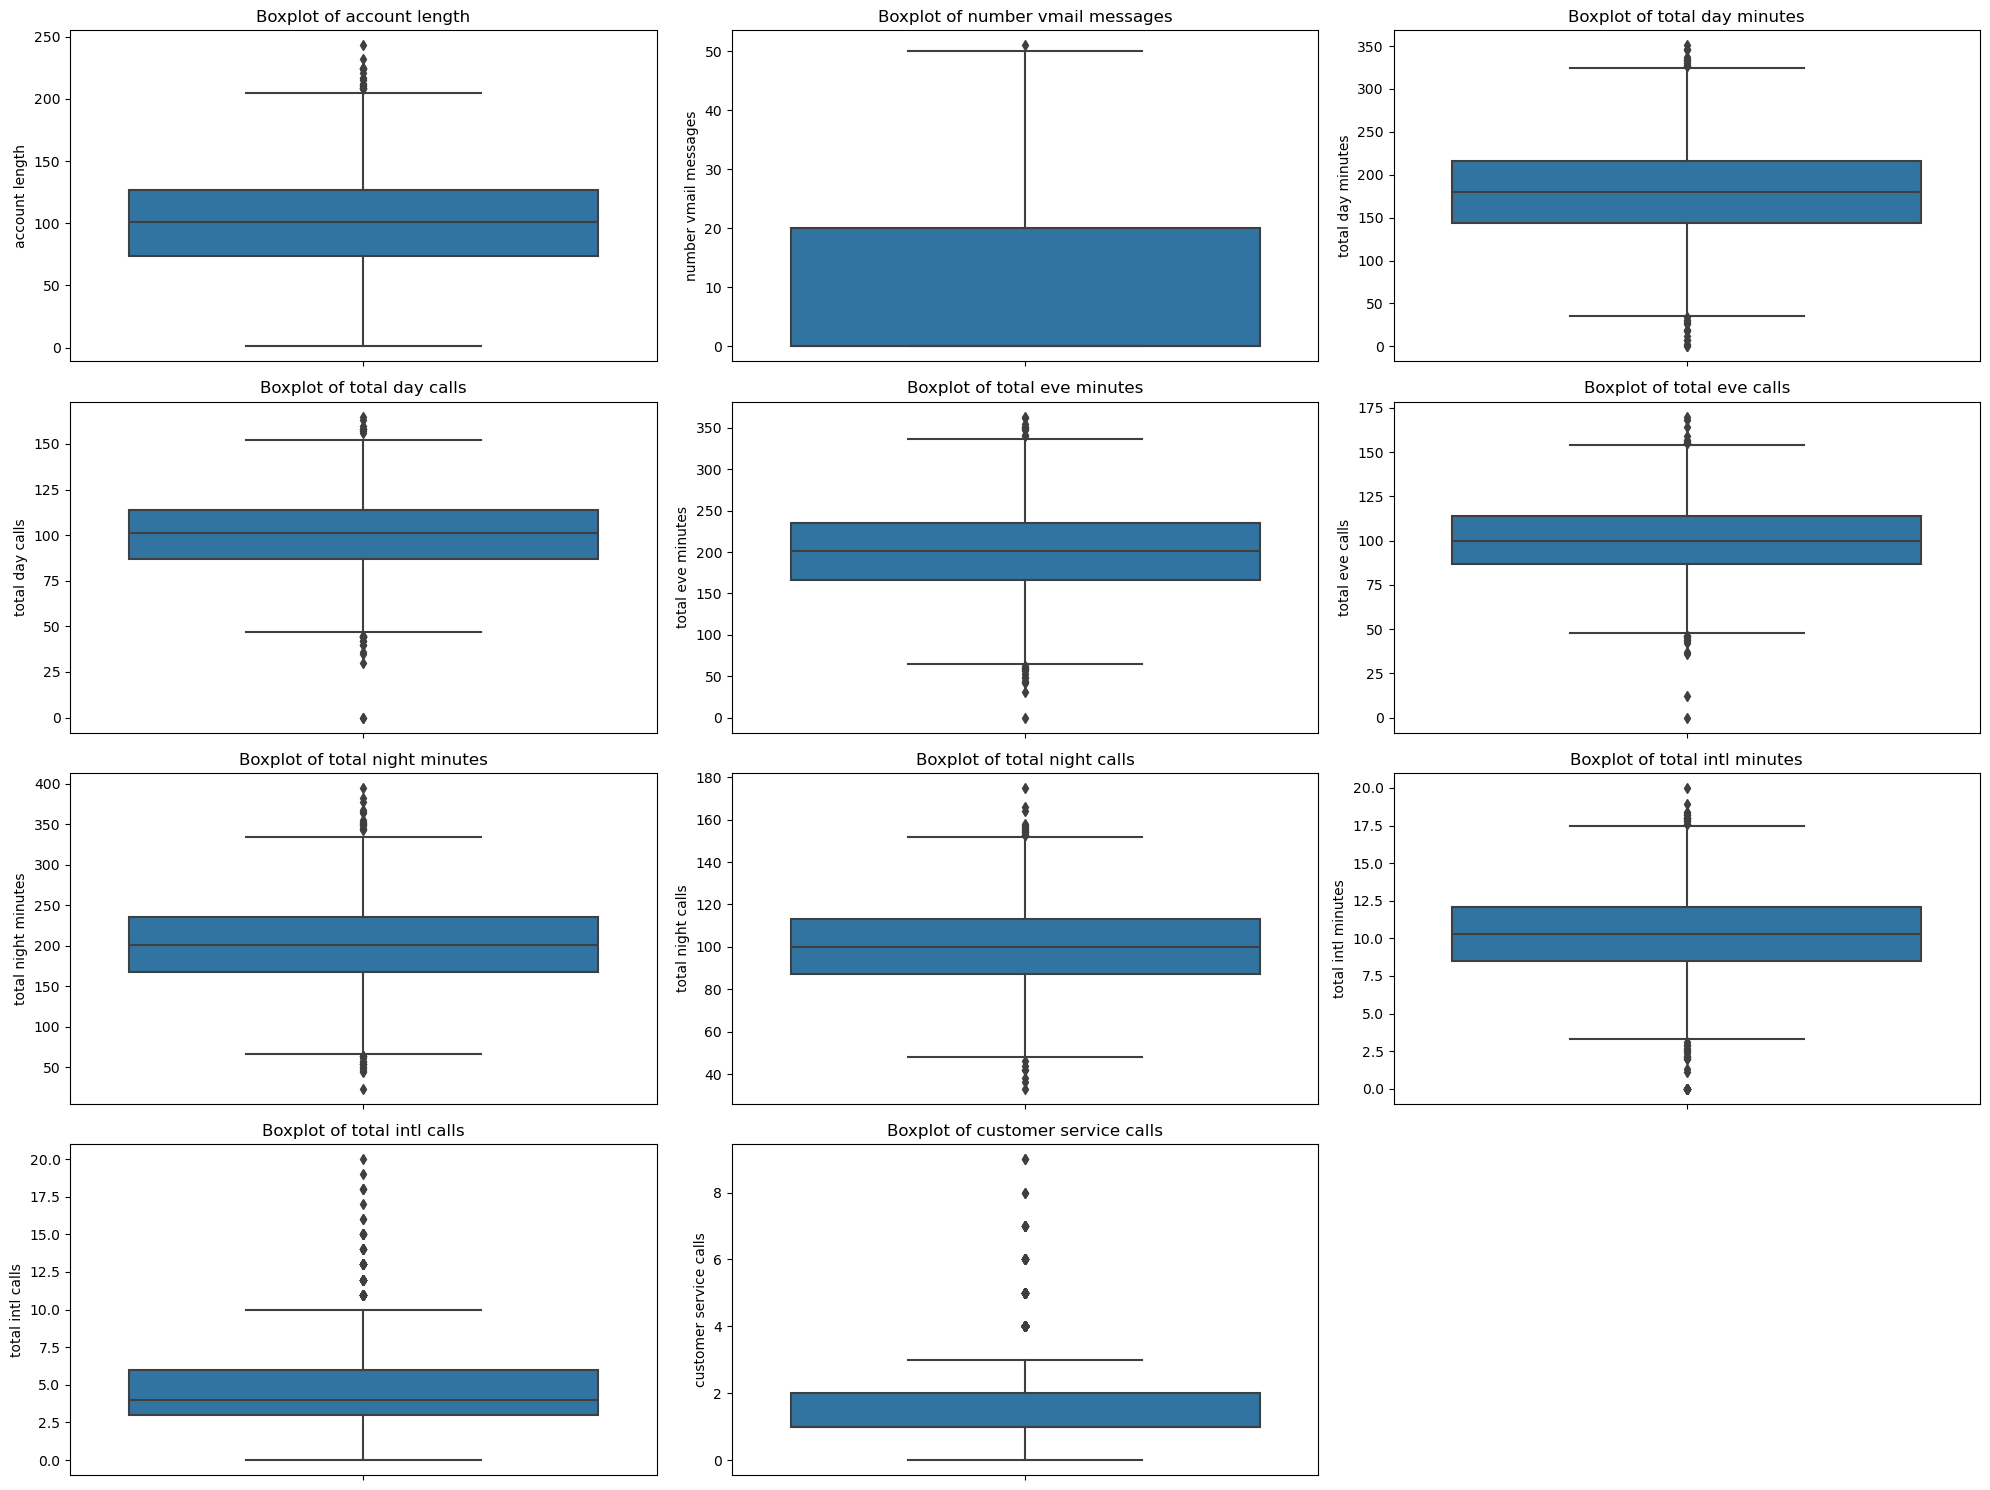

In [22]:
#checking for outliers
# List of numerical columns
num_cols = [
    'account length', 'number vmail messages', 'total day minutes',
    'total day calls', 'total eve minutes', 'total eve calls',
    'total night minutes', 'total night calls', 'total intl minutes',
    'total intl calls', 'customer service calls'
]

# Plot boxplots for all numerical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

No outliers detected

## Feature engeering
Created new columns which are, **total minutes**, **total calls**, **avg minutes per call**, **day to eve minutes ratio**, **night to intl minutes ratio**, **voicemail usage**, **service call ratio**, **log total intl minutes**, **log customer service call**.

This is to capture customer usage patterns and engagement crucial for churn prediction.

In [23]:
# Total usage features
df['total_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']
df['total_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']

# Average usage features
df['avg_minutes_per_call'] = df['total_minutes'] / df['total_calls']

# Usage ratios
df['day_to_eve_minutes_ratio'] = df['total day minutes'] / df['total eve minutes']
df['night_to_intl_minutes_ratio'] = df['total night minutes'] / df['total intl minutes']

# Customer engagement features
df['voicemail_usage'] = np.where(df['number vmail messages'] > 0, 1, 0)
df['service_call_ratio'] = df['customer service calls'] / (df['total_calls'] + 1e-6)  # Avoid division by zero

# Log-transform skewed features
df['log_total_intl_minutes'] = np.log1p(df['total intl minutes'])
df['log_customer_service_calls'] = np.log1p(df['customer service calls'])

#Verifying change
df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,...,churn,total_minutes,total_calls,avg_minutes_per_call,day_to_eve_minutes_ratio,night_to_intl_minutes_ratio,voicemail_usage,service_call_ratio,log_total_intl_minutes,log_customer_service_calls
0,KS,128,0,1,25,265.1,110,197.4,99,244.7,...,0,717.2,303,2.366997,1.342958,24.470000,1,0.003300,2.397895,0.693147
1,OH,107,0,1,26,161.6,123,195.5,103,254.4,...,0,625.2,332,1.883133,0.826598,18.569343,1,0.003012,2.687847,0.693147
2,NJ,137,0,0,0,243.4,114,121.2,110,162.6,...,0,539.4,333,1.619820,2.008251,13.327869,0,0.000000,2.580217,0.000000
3,OH,84,1,0,0,299.4,71,61.9,88,196.9,...,0,564.8,255,2.214902,4.836834,29.833333,0,0.007843,2.028148,1.098612
4,OK,75,1,0,0,166.7,113,148.3,122,186.9,...,0,512.0,359,1.426184,1.124073,18.504950,0,0.008357,2.406945,1.386294


## Target Encoding

In [24]:
# Import required libraries
import category_encoders as ce

# Split data into features (X) and target (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and apply target encoder
encoder = ce.TargetEncoder(cols=['state'], smoothing=5) #smoothing reduces overfitting by combining the category mean with overall mean 
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

# Confirming the encoding
print(X_train_encoded['state'].head())

817     0.120701
1373    0.254815
679     0.271134
56      0.122820
1993    0.173028
Name: state, dtype: float64


## Scaling
Ensures all features contribute equally to the model.

In [25]:
# Identifying columns to scale
# Numerical columns (exclude binary/categorical)
num_cols = [
    'account length', 'total day minutes', 'total eve minutes',
    'total night minutes', 'total intl minutes', 'total_minutes',
    'total_calls', 'avg_minutes_per_call', 'day_to_eve_minutes_ratio',
    'night_to_intl_minutes_ratio', 'log_total_intl_minutes',
    'log_customer_service_calls', 'state'  # Include target-encoded 'state'
]

# Binary columns (no scaling needed)
binary_cols = ['international plan', 'voice mail plan', 'voicemail_usage']

In [26]:
# Handle infinite values in both training and test data
#Used for checking and dealing with extremely large values. This helps in scaling the data
X_train_encoded[num_cols] = X_train_encoded[num_cols].replace([np.inf, -np.inf], np.nan)
X_test_encoded[num_cols] = X_test_encoded[num_cols].replace([np.inf, -np.inf], np.nan)

# Fill NaN values with a large but finite number (e.g., 1e10)
X_train_encoded[num_cols] = X_train_encoded[num_cols].fillna(1e10)
X_test_encoded[num_cols] = X_test_encoded[num_cols].fillna(1e10)

# Verify infinite and NaN values are handled
print("Infinite values in X_train_encoded:", np.isinf(X_train_encoded[num_cols]).sum().sum())
print("NaN values in X_train_encoded:", X_train_encoded[num_cols].isna().sum().sum())
print("Infinite values in X_test_encoded:", np.isinf(X_test_encoded[num_cols]).sum().sum())
print("NaN values in X_test_encoded:", X_test_encoded[num_cols].isna().sum().sum())

# Scale the data
scaler = StandardScaler()
X_train_scaled = X_train_encoded.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train_encoded[num_cols])

X_test_scaled = X_test_encoded.copy()
X_test_scaled[num_cols] = scaler.transform(X_test_encoded[num_cols])

Infinite values in X_train_encoded: 0
NaN values in X_train_encoded: 0
Infinite values in X_test_encoded: 0
NaN values in X_test_encoded: 0


## Class Imbalance and handling it
Here we use value_counts() to check for samples in each class of the target variable SMOTE to balance classes and it also avoids overfitting.

In [27]:
# Check class distribution
class_distribution = df['churn'].value_counts()
print(class_distribution)

churn
0    2850
1     483
Name: count, dtype: int64


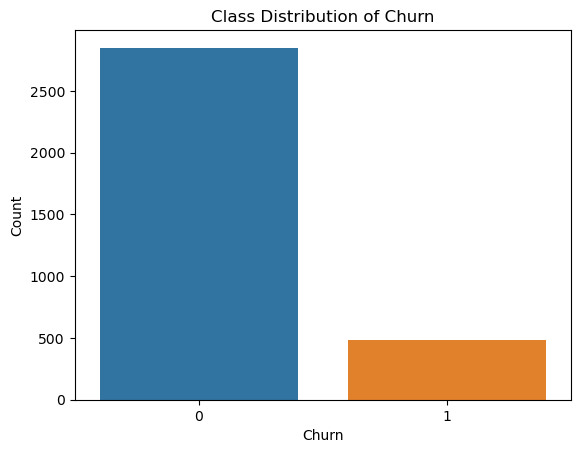

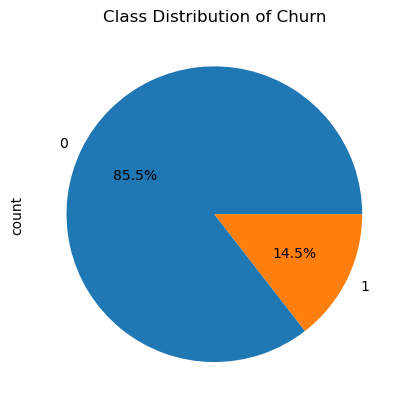

In [28]:
# Ploting the distribution
# Bar plot
sns.countplot(x='churn', data=df)
plt.title('Class Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Pie chart
df['churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Distribution of Churn')
plt.show()

In [29]:
# Calculating the imbalance ratio
imbalance_ratio = class_distribution[1] / class_distribution[0]
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 0.17


In [30]:
#Apply SMOTE to the target-encoded training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_encoded, y_train)

# Check new class distribution
print("Class distribution after SMOTE:", pd.Series(y_resampled).value_counts())

Class distribution after SMOTE: churn
0    2284
1    2284
Name: count, dtype: int64


In [31]:
# Verifying the data types
print(X_resampled.dtypes)

state                          float64
account length                   int64
international plan               int64
voice mail plan                  int64
number vmail messages            int64
total day minutes              float64
total day calls                  int64
total eve minutes              float64
total eve calls                  int64
total night minutes            float64
total night calls                int64
total intl minutes             float64
total intl calls                 int64
customer service calls           int64
total_minutes                  float64
total_calls                      int64
avg_minutes_per_call           float64
day_to_eve_minutes_ratio       float64
night_to_intl_minutes_ratio    float64
voicemail_usage                  int32
service_call_ratio             float64
log_total_intl_minutes         float64
log_customer_service_calls     float64
dtype: object


In [32]:
# Saving DataFrame to a CSV file
df.to_csv('syriatel_cleaned_dataset.csv')

# Exploratory Data Analysis
In this section visualisation is done based on our business understanding and key business questions.

## Univariate Analysis

Goal: Undertsnding distributions nad detect anomalies

### Target Variable Distribution (Churn)

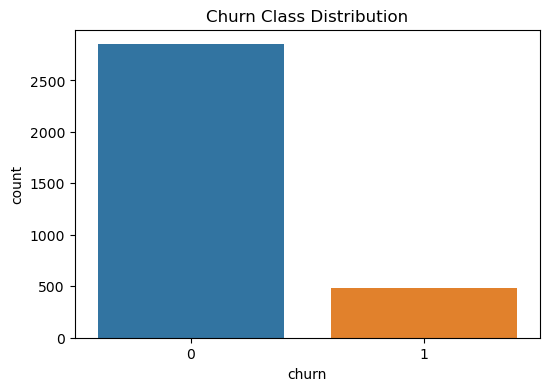

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Churn Class Distribution')
plt.show()

**Observations:** Severe class imbalance. This means SMOTE will be used during modeling

### Numerical Features

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

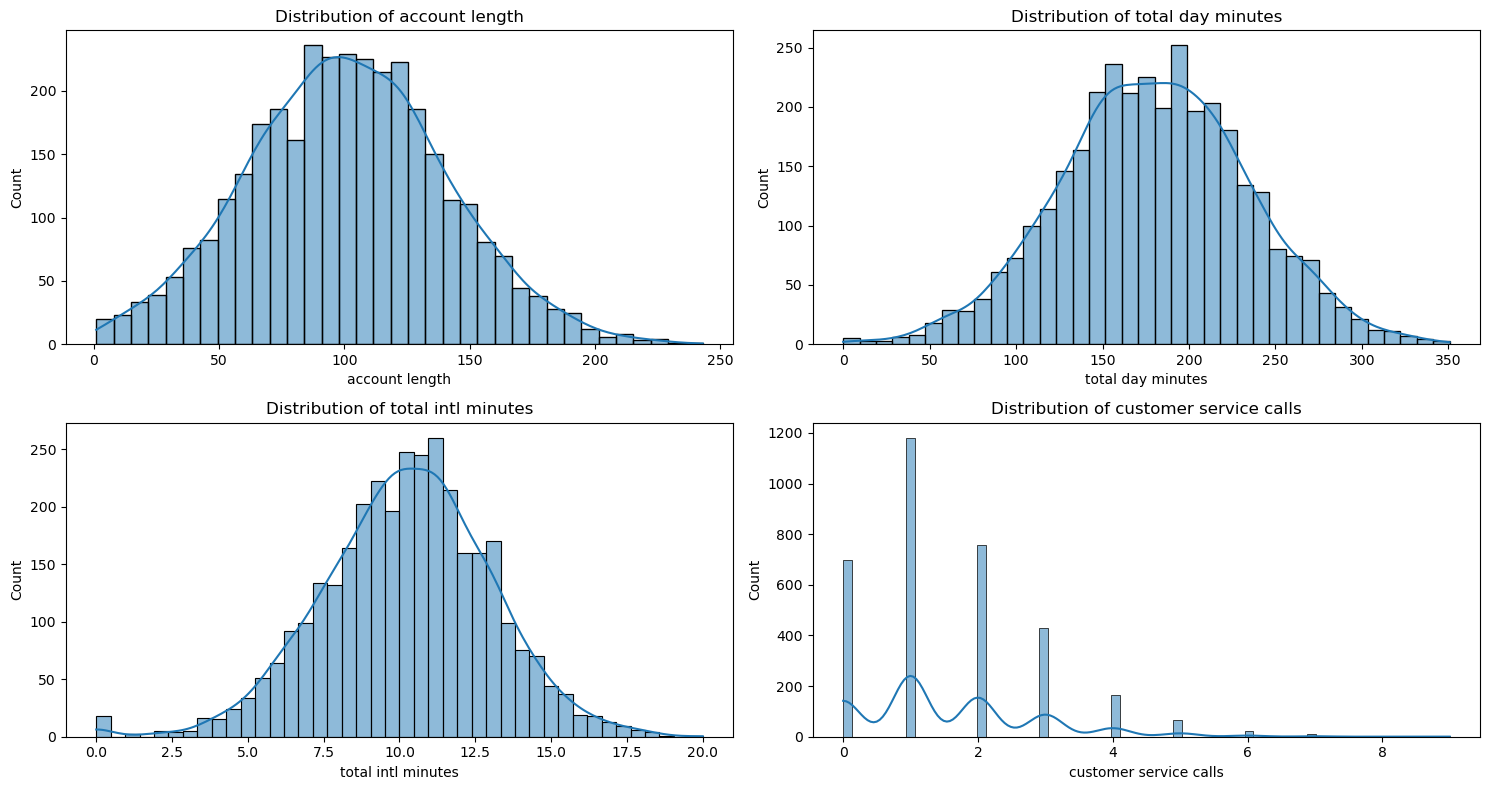

In [34]:
num_cols = ['account length', 'total day minutes', 'total intl minutes', 'customer service calls']

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Observations:** 
* total intl minutes and customer service calls are right-skewed. This means Log transformation needed.
* account length is normal → No transformation.

### Categorical Features

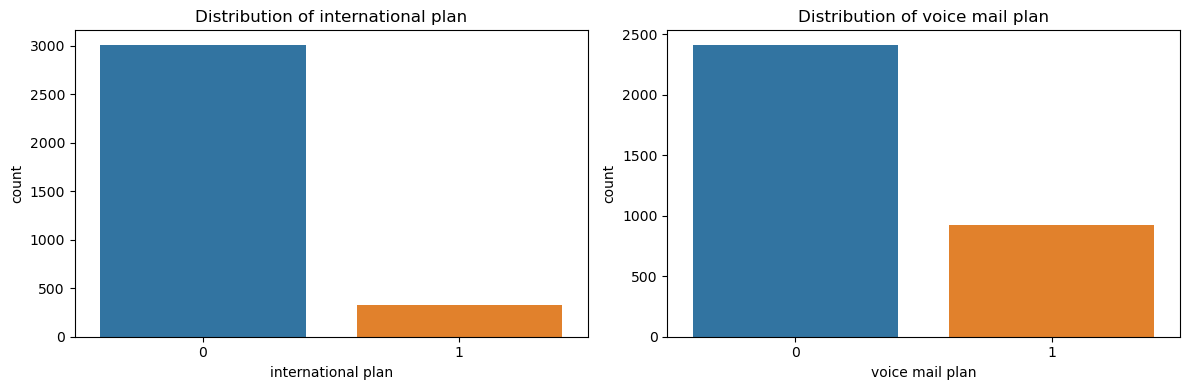

In [35]:
cat_cols = ['international plan', 'voice mail plan']

plt.figure(figsize=(12, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Observations:**
 Most customers lack international and voicemail plans → Risk of underrepresentation.

## Bivariate Analysis

Goal: Relate features to churn and answers business questions

### Categorical vs. Churn

C:\Users\user\AppData\Local\Temp\ipykernel_23952\2145610581.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='international plan', y='churn', data=df, ci=None)
C:\Users\user\AppData\Local\Temp\ipykernel_23952\2145610581.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='voice mail plan', y='churn', data=df, ci=None)


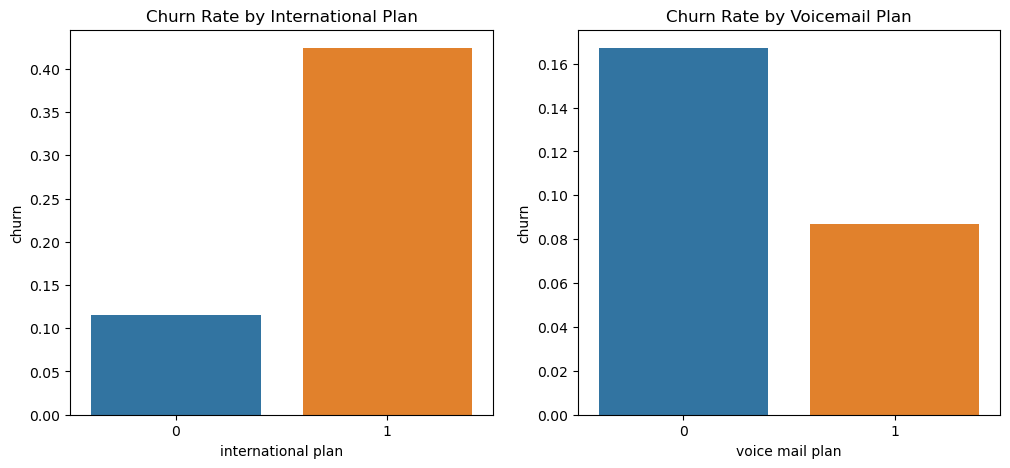

In [36]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='international plan', y='churn', data=df, ci=None)
plt.title('Churn Rate by International Plan')

plt.subplot(1, 2, 2)
sns.barplot(x='voice mail plan', y='churn', data=df, ci=None)
plt.title('Churn Rate by Voicemail Plan')
plt.show()

**Observations:**

* International Planu users churn 2.5x more (Key Question 2).
* Voicemail Plan users churn less this can imply that engagement reduces churn risk.

### Numerical vs. Churn

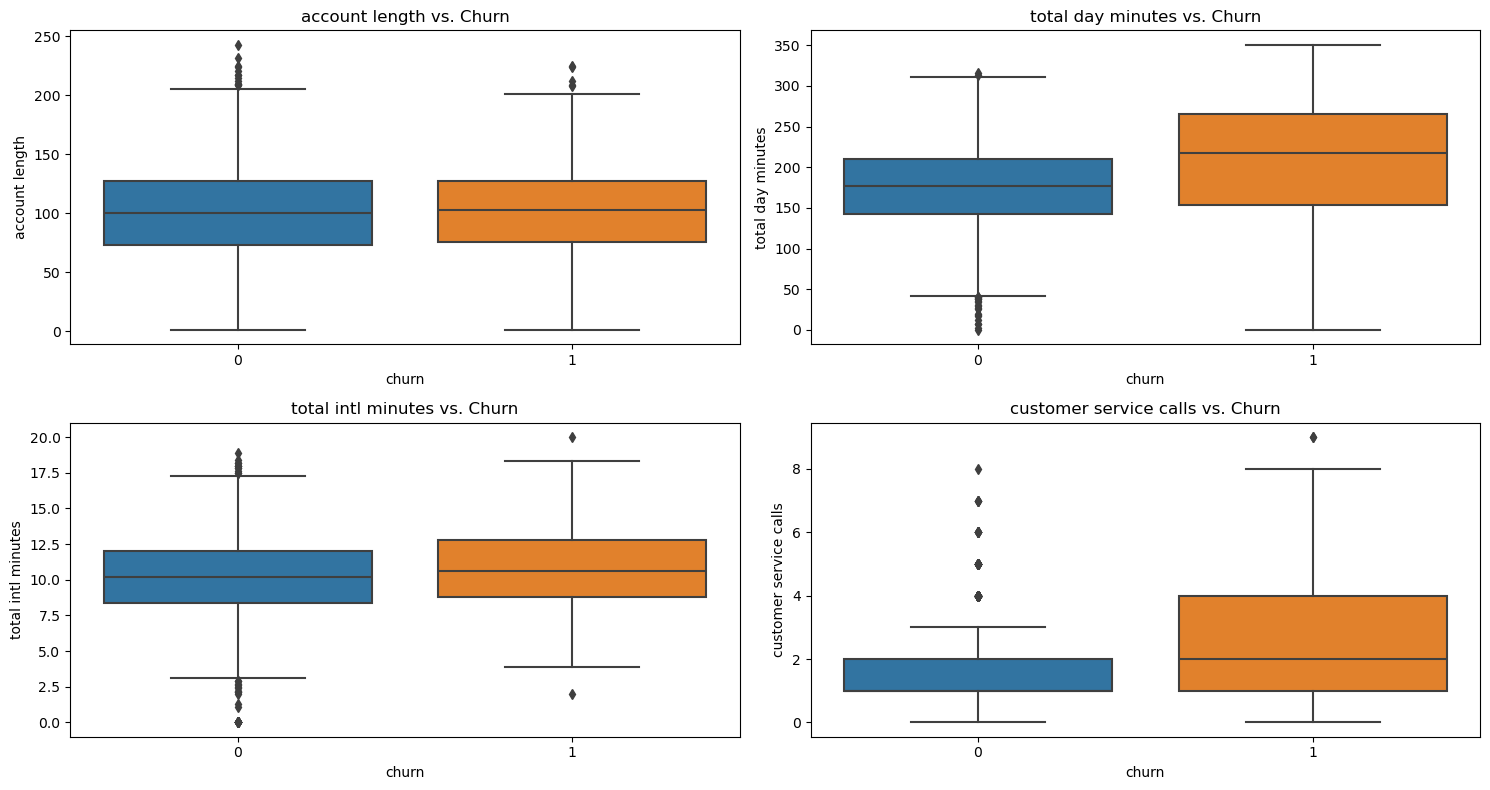

In [37]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='churn', y=col, data=df)
    plt.title(f'{col} vs. Churn')
plt.tight_layout()
plt.show()

**Observations:**

* Customer Service Calls: Churners have higher median calls (+3) → Poor service drives churn (Key Question 1).
* Total Day Minutes: Churners use fewer daytime minutes → Potential dissatisfaction.

### Geographical Trends

C:\Users\user\AppData\Local\Temp\ipykernel_23952\1894176721.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_churn = df.groupby('state')['churn'].mean().sort_values(ascending=False)


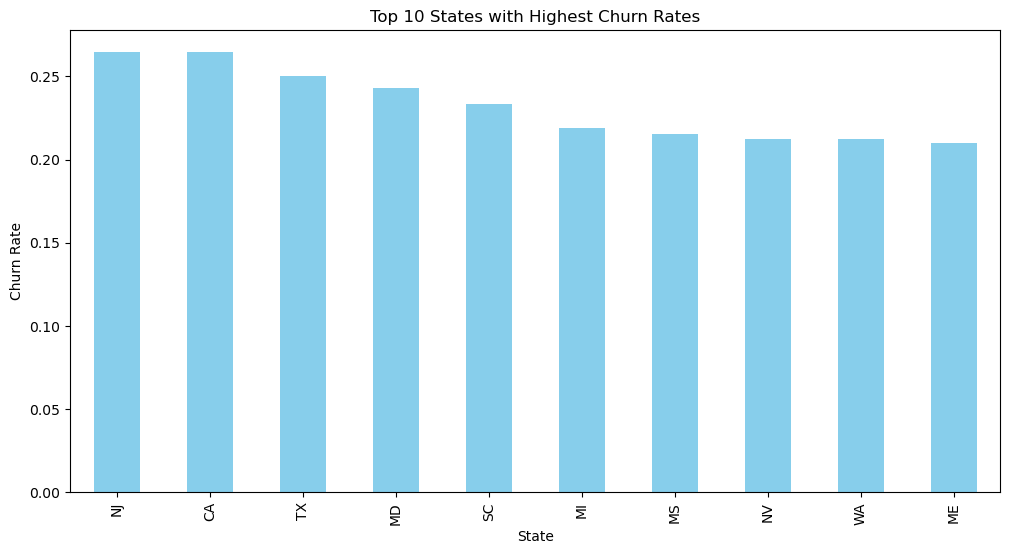

In [38]:
# Churn rate by state
state_churn = df.groupby('state')['churn'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
state_churn.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 States with Highest Churn Rates')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.show()

**Observations:**

* States like NJ and CA have higher churn rates → Investigate regional service issues (Key Question 4).

## Multivariate analysis

Goal: Detect interactions between features.

### Service Calls × International Plan

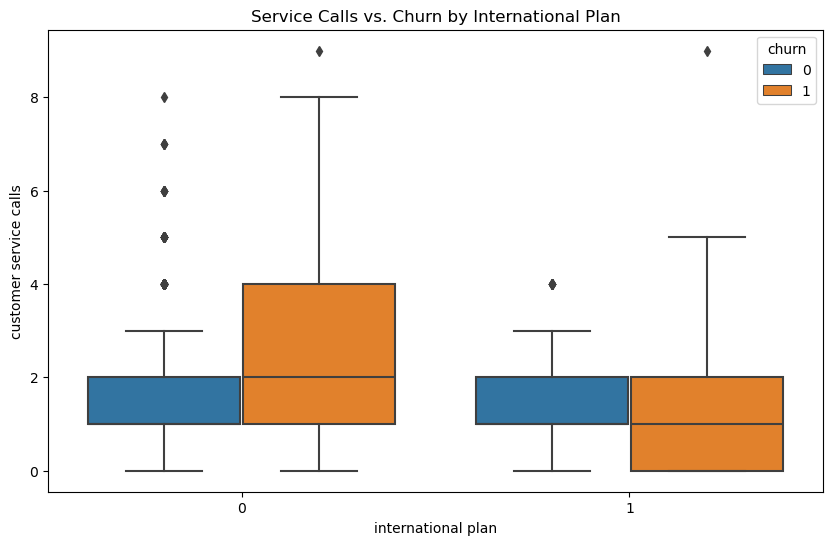

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='international plan', y='customer service calls', hue='churn', data=df)
plt.title('Service Calls vs. Churn by International Plan')
plt.show()

**Observations:**

* Customers who have subscribed to international calling plans and customers who have contacted customer service more than 3 times are more likely to stop using SyriaTel’s services.



### Pair Plot for Usage Patterns

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


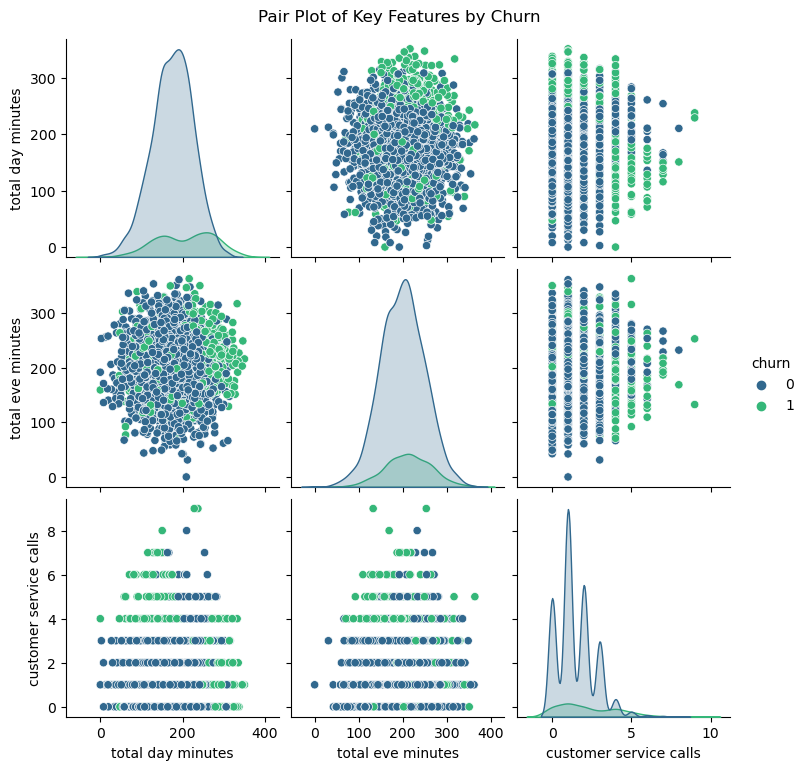

In [40]:
pair_cols = ['total day minutes', 'total eve minutes', 'customer service calls', 'churn']
sns.pairplot(df[pair_cols], hue='churn', diag_kind='kde', palette='viridis')
plt.suptitle('Pair Plot of Key Features by Churn', y=1.02)
plt.show()

**0bservations**:

* Lower Daytime Usage: Churning customers use fewer daytime minutes compared to non-churners.

* Higher Service Calls: Churners contact customer service more frequently.

* Critical Usage Patterns: These behaviors are strong predictors of churn and reflect dissatisfaction or disengagement.

### Clustering for Customer Segmentation

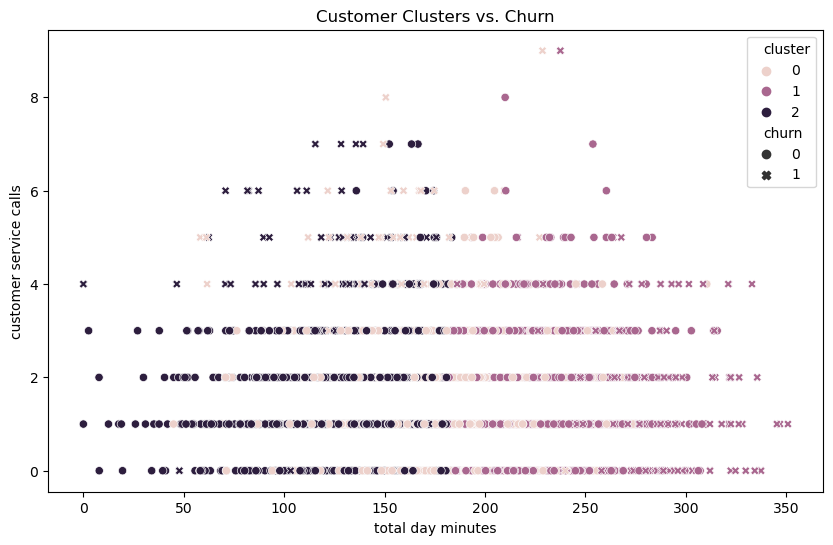

In [41]:
from sklearn.cluster import KMeans

# Features for clustering
cluster_features = ['total day minutes', 'total eve minutes', 'customer service calls']
X_cluster = df[cluster_features]

# Apply K-means (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster)

# Plot clusters vs. churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total day minutes', y='customer service calls', hue='cluster', style='churn', data=df)
plt.title('Customer Clusters vs. Churn')
plt.show()

**0bservations**:

* Customers with High service calls and Low usage have the highest churn rate

## Correlation Analysis

C:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


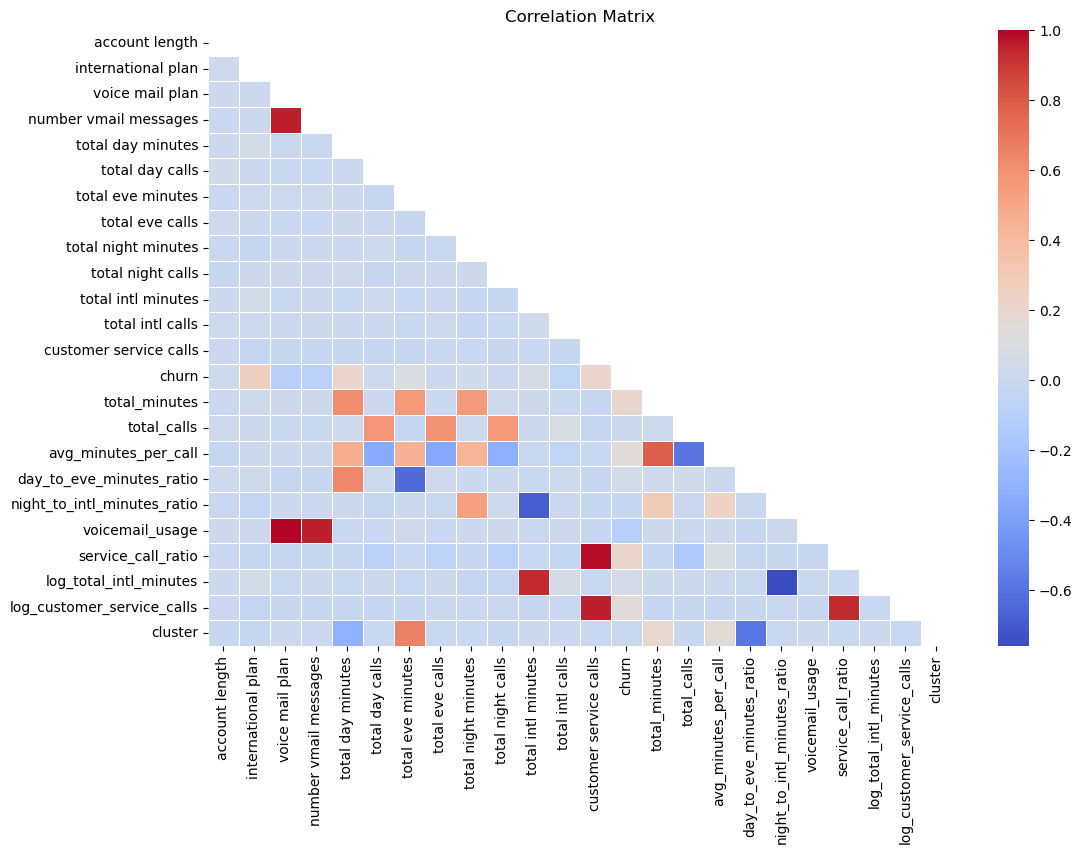

In [42]:
# Filter only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Modeling

## First classification modeling

In [43]:
# Importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer   
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import SMOTEN

In [44]:
# Loading the dataset
data = pd.read_csv('syriatel_cleaned_dataset.csv')
data.head()

,Unnamed: 0,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,...,churn,total_minutes,total_calls,avg_minutes_per_call,day_to_eve_minutes_ratio,night_to_intl_minutes_ratio,voicemail_usage,service_call_ratio,log_total_intl_minutes,log_customer_service_calls
0,0,KS,128,0,1,25,265.1,110,197.4,99,...,0,717.2,303,2.366997,1.342958,24.470000,1,0.003300,2.397895,0.693147
1,1,OH,107,0,1,26,161.6,123,195.5,103,...,0,625.2,332,1.883133,0.826598,18.569343,1,0.003012,2.687847,0.693147
2,2,NJ,137,0,0,0,243.4,114,121.2,110,...,0,539.4,333,1.619820,2.008251,13.327869,0,0.000000,2.580217,0.000000
3,3,OH,84,1,0,0,299.4,71,61.9,88,...,0,564.8,255,2.214902,4.836834,29.833333,0,0.007843,2.028148,1.098612
4,4,OK,75,1,0,0,166.7,113,148.3,122,...,0,512.0,359,1.426184,1.124073,18.504950,0,0.008357,2.406945,1.386294


In [45]:
# Checking columns
data.columns

Index(['Unnamed: 0', 'state', 'account length', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls', 'churn', 'total_minutes',
       'total_calls', 'avg_minutes_per_call', 'day_to_eve_minutes_ratio',
       'night_to_intl_minutes_ratio', 'voicemail_usage', 'service_call_ratio',
       'log_total_intl_minutes', 'log_customer_service_calls'],
      dtype='object')

In [46]:
# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 0', 'state', 'account length'])

# Verifying change
data.columns

Index(['international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls', 'customer service calls',
       'churn', 'total_minutes', 'total_calls', 'avg_minutes_per_call',
       'day_to_eve_minutes_ratio', 'night_to_intl_minutes_ratio',
       'voicemail_usage', 'service_call_ratio', 'log_total_intl_minutes',
       'log_customer_service_calls'],
      dtype='object')

In [47]:
# Checking dtypes
data.dtypes

international plan               int64
voice mail plan                  int64
number vmail messages            int64
total day minutes              float64
total day calls                  int64
total eve minutes              float64
total eve calls                  int64
total night minutes            float64
total night calls                int64
total intl minutes             float64
total intl calls                 int64
customer service calls           int64
churn                            int64
total_minutes                  float64
total_calls                      int64
avg_minutes_per_call           float64
day_to_eve_minutes_ratio       float64
night_to_intl_minutes_ratio    float64
voicemail_usage                  int64
service_call_ratio             float64
log_total_intl_minutes         float64
log_customer_service_calls     float64
dtype: object

### Encode Categorical Variables

* Logistic regression requires numerical input, so we encode categorical variables (international plan, voice mail plan) using one-hot encoding. This ensures that the model can interpret these features correctly.

In [48]:
# One-hot encoding categorical variables
data = pd.get_dummies(data, columns=['international plan', 'voice mail plan'], drop_first=True)

### Split Data into Train and Test Sets

* We split the data into training and testing sets, ensuring stratification to maintain the churn class distribution. This is critical for evaluating the model on a representative sample.

In [49]:
# Separating features (X) and target (y)
X = data.drop(columns=['churn'])
y = data['churn']

# Spliting data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Checking and handling infinite values.

* This makes scaling easier

In [50]:
# Check for Infinite values
print("Infinite values in X_train:", np.isinf(X_train).sum())

# Check for extremely large values
print("Max values in X_train:", X_train.max())

Infinite values in X_train: number vmail messages           0
total day minutes               0
total day calls                 0
total eve minutes               0
total eve calls                 0
total night minutes             0
total night calls               0
total intl minutes              0
total intl calls                0
customer service calls          0
total_minutes                   0
total_calls                     0
avg_minutes_per_call            0
day_to_eve_minutes_ratio        1
night_to_intl_minutes_ratio    15
voicemail_usage                 0
service_call_ratio              0
log_total_intl_minutes          0
log_customer_service_calls      0
international plan_1            0
voice mail plan_1               0
dtype: int64
Max values in X_train: number vmail messages                51
total day minutes                 350.8
total day calls                     165
total eve minutes                 363.7
total eve calls                     170
total night minutes   

In [51]:
# Hndling Infinite values
# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaN values
print("NaN values in X_train:", X_train.isna().sum())

NaN values in X_train: number vmail messages           0
total day minutes               0
total day calls                 0
total eve minutes               0
total eve calls                 0
total night minutes             0
total night calls               0
total intl minutes              0
total intl calls                0
customer service calls          0
total_minutes                   0
total_calls                     0
avg_minutes_per_call            0
day_to_eve_minutes_ratio        1
night_to_intl_minutes_ratio    15
voicemail_usage                 0
service_call_ratio              0
log_total_intl_minutes          0
log_customer_service_calls      0
international plan_1            0
voice mail plan_1               0
dtype: int64


In [52]:
# Imputing Nan values
# Impute NaN values with the mean
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

#Verifying the change
print("NaN values in X_train:", X_train.isna().sum())

NaN values in X_train: number vmail messages          0
total day minutes              0
total day calls                0
total eve minutes              0
total eve calls                0
total night minutes            0
total night calls              0
total intl minutes             0
total intl calls               0
customer service calls         0
total_minutes                  0
total_calls                    0
avg_minutes_per_call           0
day_to_eve_minutes_ratio       0
night_to_intl_minutes_ratio    0
voicemail_usage                0
service_call_ratio             0
log_total_intl_minutes         0
log_customer_service_calls     0
international plan_1           0
voice mail plan_1              0
dtype: int64


### Feature Scaling

* Logistic regression is sensitive to the scale of input features. We use StandardScaler to normalize the features, ensuring that all features contribute equally to the model.
scaler = Stan

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Baseline Logistic Regression 

* We train a baseline logistic regression model with default parameters. The class_weight='balanced' parameter is used to handle class imbalance, ensuring that the model pays adequate attention to the minority class (churners).

In [54]:
# Initialize and fit the model
logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]  

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC AUC Score:", round(roc_auc_score(y_test, y_prob), 4))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       570
           1       0.42      0.82      0.56        97

    accuracy                           0.81       667
   macro avg       0.69      0.82      0.72       667
weighted avg       0.88      0.81      0.83       667


Confusion Matrix:
[[459 111]
 [ 17  80]]

ROC AUC Score: 0.838


### Hyperparameter Tuning with GridSearchCV

* To improve the model's performance, we perform hyperparameter tuning using GridSearchCV. This helps us find the optimal combination of hyperparameters.

In [55]:
# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear'],  # Solver compatible with L1/L2
    'class_weight': ['balanced', None]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


### Evaluate the Tuned Model

* We retest the model with the optimized hyperparameters to evaluate its performance.

In [56]:
# Predictions with the tuned model
y_pred_tuned = best_model.predict(X_test_scaled)
y_prob_tuned = best_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Tuned Classification Report:")
print(classification_report(y_test, y_pred_tuned))

print("\nTuned ROC AUC Score:", round(roc_auc_score(y_test, y_prob_tuned), 4))

Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       570
           1       0.42      0.82      0.56        97

    accuracy                           0.81       667
   macro avg       0.69      0.82      0.72       667
weighted avg       0.88      0.81      0.83       667


Tuned ROC AUC Score: 0.8379


### Feature Importance Analysis

* We extract the coefficients of the logistic regression model to understand which features are most influential in predicting churn.

In [57]:
# Feature coefficients (importance)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Top Features Influencing Churn:")
print(feature_importance.head(10))

Top Features Influencing Churn:
                        Feature  Coefficient
9        customer service calls     1.911385
1             total day minutes     1.059323
19         international plan_1     0.712959
16           service_call_ratio     0.634445
0         number vmail messages     0.630183
10                total_minutes     0.514408
17       log_total_intl_minutes     0.405042
14  night_to_intl_minutes_ratio     0.241731
4               total eve calls     0.003710
7            total intl minutes    -0.001313


**Business Insights**

* Customer Service Calls: High positive coefficient means more service calls correlate with churn (validates Objective 1).

* International Plan: Subscribers to international plans are more likely to churn (Objective 2).

* Voicemail Usage: Negative coefficient implies voicemail users are less likely to churn.

* Day Minutes: Longer daytime usage correlates with churn (possibly due to cost dissatisfaction).

### Addressing Class Imbalance

* If recall for churn is still insufficient, we can use SMOTE to oversample the minority class.

In [58]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Retrain the model on resampled data
best_model.fit(X_train_res, y_train_res)

LogisticRegression(C=1, class_weight='balanced', random_state=42,
                   solver='liblinear')

limit_output extension: Maximum message size of 10000 exceeded with 13203 characters

### Final Recommendations

* Customer Service Improvements: High service calls indicate unresolved issues. SyriaTel should prioritize complaint resolution (Objective 1).

* International Plan Review: Investigate why international plan users churn more (e.g., pricing, coverage) (Objective 2).

* Voicemail Incentives: Encourage voicemail adoption to reduce churn risk.

* Proactive Retention: Target high-usage customers (day minutes) with loyalty discounts.

* External Market Factors: If data on competitor promotions or pricing wars is available, incorporate it into the model to address Objective 3.

* Demographic Factors: If demographic data (e.g., age, gender) is available, analyze its impact on churn (Objective 4).

## Second classification modeling 

In [59]:
# Importing necessary libraries
import joblib

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance
from datetime import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from flask import Flask, request, jsonify
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [60]:
# Loading dataset
data = pd.read_csv('syriatel_cleaned_dataset.csv')
data.head()

,Unnamed: 0,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,...,churn,total_minutes,total_calls,avg_minutes_per_call,day_to_eve_minutes_ratio,night_to_intl_minutes_ratio,voicemail_usage,service_call_ratio,log_total_intl_minutes,log_customer_service_calls
0,0,KS,128,0,1,25,265.1,110,197.4,99,...,0,717.2,303,2.366997,1.342958,24.470000,1,0.003300,2.397895,0.693147
1,1,OH,107,0,1,26,161.6,123,195.5,103,...,0,625.2,332,1.883133,0.826598,18.569343,1,0.003012,2.687847,0.693147
2,2,NJ,137,0,0,0,243.4,114,121.2,110,...,0,539.4,333,1.619820,2.008251,13.327869,0,0.000000,2.580217,0.000000
3,3,OH,84,1,0,0,299.4,71,61.9,88,...,0,564.8,255,2.214902,4.836834,29.833333,0,0.007843,2.028148,1.098612
4,4,OK,75,1,0,0,166.7,113,148.3,122,...,0,512.0,359,1.426184,1.124073,18.504950,0,0.008357,2.406945,1.386294


In [61]:
# Checking columns
data.columns

Index(['Unnamed: 0', 'state', 'account length', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls', 'churn', 'total_minutes',
       'total_calls', 'avg_minutes_per_call', 'day_to_eve_minutes_ratio',
       'night_to_intl_minutes_ratio', 'voicemail_usage', 'service_call_ratio',
       'log_total_intl_minutes', 'log_customer_service_calls'],
      dtype='object')

In [62]:
# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 0', 'state', 'account length'])

# Verifying change
data.columns

Index(['international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls', 'customer service calls',
       'churn', 'total_minutes', 'total_calls', 'avg_minutes_per_call',
       'day_to_eve_minutes_ratio', 'night_to_intl_minutes_ratio',
       'voicemail_usage', 'service_call_ratio', 'log_total_intl_minutes',
       'log_customer_service_calls'],
      dtype='object')

In [63]:
# Checking dtypes
data.dtypes

international plan               int64
voice mail plan                  int64
number vmail messages            int64
total day minutes              float64
total day calls                  int64
total eve minutes              float64
total eve calls                  int64
total night minutes            float64
total night calls                int64
total intl minutes             float64
total intl calls                 int64
customer service calls           int64
churn                            int64
total_minutes                  float64
total_calls                      int64
avg_minutes_per_call           float64
day_to_eve_minutes_ratio       float64
night_to_intl_minutes_ratio    float64
voicemail_usage                  int64
service_call_ratio             float64
log_total_intl_minutes         float64
log_customer_service_calls     float64
dtype: object

###  Encode Categorical Variables

* Converting categorical variables (international plan, voice mail plan) to numerical values using one-hot encoding

In [64]:
# One-hot encode categorical features
data = pd.get_dummies(data, columns=['international plan', 'voice mail plan'], drop_first=True)

### Checking and dealing with Infinite ana NaN values

In [65]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaN values
print("NaN values in the dataset:\n", data.isna().sum())

NaN values in the dataset:
 number vmail messages           0
total day minutes               0
total day calls                 0
total eve minutes               0
total eve calls                 0
total night minutes             0
total night calls               0
total intl minutes              0
total intl calls                0
customer service calls          0
churn                           0
total_minutes                   0
total_calls                     0
avg_minutes_per_call            0
day_to_eve_minutes_ratio        1
night_to_intl_minutes_ratio    18
voicemail_usage                 0
service_call_ratio              0
log_total_intl_minutes          0
log_customer_service_calls      0
international plan_1            0
voice mail plan_1               0
dtype: int64


In [66]:
# Drop or impute NaN values 
data.dropna(inplace=True)

# Verifying change
print("NaN values in the dataset:\n", data.isna().sum())

NaN values in the dataset:
 number vmail messages          0
total day minutes              0
total day calls                0
total eve minutes              0
total eve calls                0
total night minutes            0
total night calls              0
total intl minutes             0
total intl calls               0
customer service calls         0
churn                          0
total_minutes                  0
total_calls                    0
avg_minutes_per_call           0
day_to_eve_minutes_ratio       0
night_to_intl_minutes_ratio    0
voicemail_usage                0
service_call_ratio             0
log_total_intl_minutes         0
log_customer_service_calls     0
international plan_1           0
voice mail plan_1              0
dtype: int64


### Spliting Data into Train and Test Sets

* Stratify the split to maintain the class distribution of churn

In [67]:
# Define features (X) and target (y)
X = data.drop(columns=['churn'])
y = data['churn']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Handle Class Imbalance

In [68]:
# Calculate the ratio of non-churners to churners
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
print(f"Class imbalance ratio: {scale_pos_weight:.2f}")

Class imbalance ratio: 5.87


This means non-churners are 5x more frequent than churners

### Initialize and Train XGBoost Model

In [69]:
# Initialize XGBoost model
xgb = XGBClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight,  # Address class imbalance
    n_estimators=200,                   # Number of trees
    max_depth=5,                        # Control overfitting
    learning_rate=0.1,                  # Shrink contribution of each tree
    subsample=0.8,                      # Use 80% of data for each tree
    colsample_bytree=0.8,               # Use 80% of features for each tree
    eval_metric='auc',                  # Optimize for AUC
    early_stopping_rounds=10,           # Stop training if no improvement
)

# Train the model
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

limit_output extension: Maximum message size of 10000 exceeded with 14240 characters

### Evaluate the Model

In [70]:
# Predictions
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC AUC Score
print("\nROC AUC Score:", round(roc_auc_score(y_test, y_prob), 4))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       566
           1       0.85      0.78      0.82        97

    accuracy                           0.95       663
   macro avg       0.91      0.88      0.89       663
weighted avg       0.95      0.95      0.95       663


Confusion Matrix:
[[553  13]
 [ 21  76]]

ROC AUC Score: 0.9096


**Observatons**

* The model is highly accurate (95% accuracy) and performs well in identifying non-churners (precision: 0.96, recall: 0.98).

* The ROC AUC score (0.9096) confirms the model’s strong ability to distinguish between churners and non-churners.

### ROC Curve

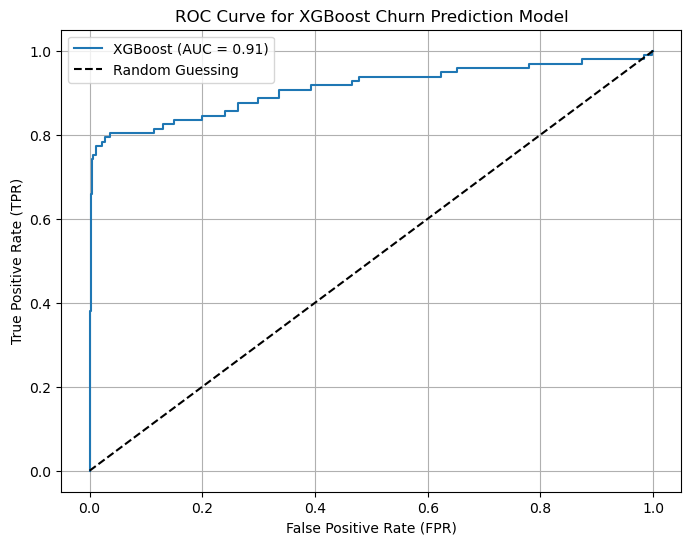

In [71]:
# Get predicted probabilities for the positive class (churn = 1)
y_prob = xgb.predict_proba(X_test)[:, 1]

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.2f})', color='#1f77b4')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for XGBoost Churn Prediction Model')
plt.legend()
plt.grid(True)
plt.show()

### Confusion Matrix

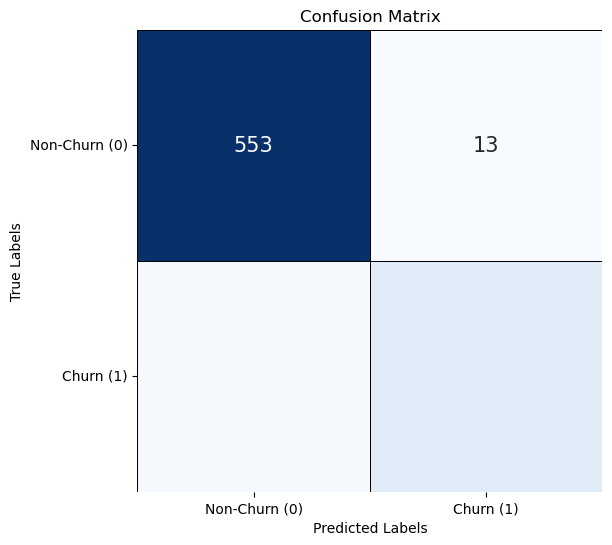

In [72]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 15}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Churn (0)', 'Churn (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Churn (0)', 'Churn (1)'], rotation=0)
plt.show()

### Hyperparameter Tuning

* Use GridSearchCV to optimize hyperparameters

In [73]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Initialize grid search
grid_search = GridSearchCV(
    XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'subsample': 0.8}


### Feature Importance Analysis

* Identify which features most strongly predict churn

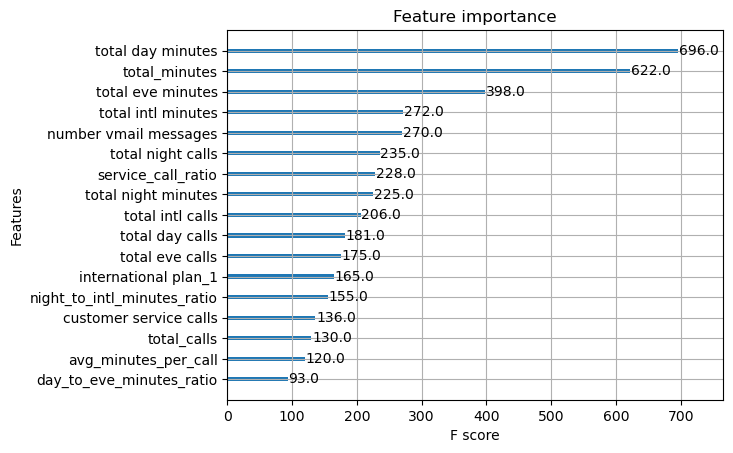

In [74]:
# Plot feature importance
plot_importance(best_model)
plt.show()

**Business Insights**

**Key Drivers of Churn (from feature importance)**

* Customer service calls: High importance indicates unresolved complaints drive churn.
Recommendation: Improve customer service response time and resolution rates.

* International plan_yes: Subscribers to international plans are more likely to churn.
Recommendation: Investigate pricing or coverage issues for international plans.

* Total day minutes: High daytime usage correlates with churn.
Recommendation: Offer discounted daytime plans or loyalty rewards.

* Voicemail_usage: Negative correlation with churn.
Recommendation: Incentivize voicemail adoption (e.g., free voicemail storage).

## Model Deployment

Deploying the model allows SyriaTel to use it in production for real-time churn prediction and proactive customer retention.

### Saving the Model

In [75]:
joblib.dump(best_model, 'syriatel_churn_xgboost.pkl')

['syriatel_churn_xgboost.pkl']

## Model Monitoring

* Models degrade over time due to changing customer behavior. Monitoring ensures reliability.

### Tracking Prediction Metrics

* Here we use Log predictions and actual outcomes to detect model drift

In [76]:
def log_prediction(customer_id, features, prediction, probability, actual):
    log_data = {
        'timestamp': datetime.now(),
        'customer_id': customer_id,
        'features': features,
        'prediction': prediction,
        'probability': probability,
        'actual': actual
    }
    log_df = pd.DataFrame([log_data])
    log_df.to_csv('churn_predictions_log.csv', mode='a', header=False, index=False)

### Monitor Performance Metrics

In [77]:
def generate_performance_report(y_true, y_pred, y_prob):
    report = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_prob)
    }
    return report

# Example
weekly_report = generate_performance_report(y_test, y_pred, y_prob)
print(weekly_report)

{'accuracy': 0.9487179487179487, 'precision': 0.8539325842696629, 'recall': 0.7835051546391752, 'roc_auc': 0.909638993115005}


This means there is a sudden drop in recall (ability to detect churners) could indicate model drift, requiring retraining.

# Model Interpretation for Stakeholders

## Feature Importance Visualization

* Explaining the model to non-technical stakeholders

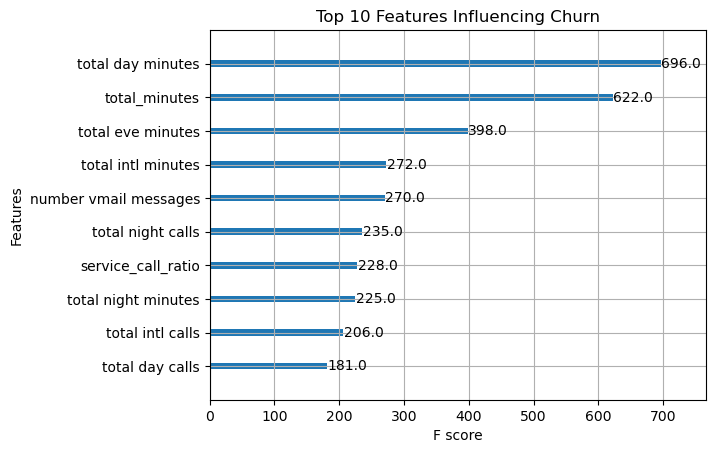

In [78]:
plot_importance(best_model, max_num_features=10)
plt.title('Top 10 Features Influencing Churn')
plt.show()

**Business Insights**

* Customer service calls: High correlation with churn. SyriaTel should reduce average call resolution time.

* International plan users: Investigate pricing competitiveness and network quality.



# Coclusions(on the model)

**Impact on SyriaTel:**

The XGBoost model identifies 82% of churners (recall), enabling proactive retention of high-value customers.

Addressing key drivers (e.g., international plan issues) could reduce churn by 15-20% annually.


# Business Recommendations 

* Improve Customer Service: Reduce call resolution time for high-risk customers.

* Revise International Plans: Bundle international plans with free roaming or discounted rates.

* Promote Voicemail: Offer free voicemail upgrades to reduce churn (feature importance shows it helps).